In [1]:
import requests
import re
import os
import nltk
import bs4
import scipy
import numpy
import numpy.matlib
import random

import sys

# Download tagger and wordnet resources if you do not have them already
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#%% Getting a list of directory contents
def gettextlist(directory_path):
    directory_textfiles=[]
    directory_nontextfiles=[]
    directory_nonfiles=[]
    # Process each item in the directory
    directory_contents=os.listdir(directory_path)
    for contentitem in directory_contents:
        temp_fullpath=os.path.join(directory_path, contentitem)
        # Non-files (e.g. subdirectories) are stored separately
        if os.path.isfile(temp_fullpath)==0:
            directory_nonfiles.append(contentitem)
        else:
            # Is this a non-text file (not ending in .txt)?
            if temp_fullpath.find('.txt')==-1:
                directory_nontextfiles.append(contentitem)
            else:
                # This is a text file
                directory_textfiles.append(contentitem)
    return(directory_textfiles,directory_nontextfiles,directory_nonfiles)

In [3]:
# %% Basic file crawler
def basicfilecrawler(directory_path):
    # Store filenames read and their text content
    num_files_read = 0
    crawled_filenames = []
    crawled_texts = []
    directory_contentlists = gettextlist(directory_path)
    # In this basic crawled we just process text files
    # and do not handle subdirectories
    # directory_textfiles=directory_contentlists[0]
    directory_textfiles = directory_contentlists[1]
    for contentitem in directory_textfiles:
        # print('Reading file:')
        # print(contentitem)
        # Open the file and read its contents
        temp_fullpath = os.path.join(directory_path, contentitem)
        temp_file = open(temp_fullpath, "r", encoding="utf-8", errors="ignore")
        temp_text = temp_file.read()
        temp_file.close()
        # Store the read filename and content
        crawled_filenames.append(contentitem)
        crawled_texts.append(temp_text)
        num_files_read = num_files_read + 1
    return (crawled_filenames, crawled_texts)

In [4]:
def read_folder(folder):
    # Read the folder contents and return the list of folder names (not including the subfolders)
    # and the list of file names
    folder_names=[]
    for root, dirs, files in os.walk(folder):
        for name in dirs:
            folder_names.append(os.path.join(root, name))
    return folder_names

In [5]:
# Read the folder contents
file_list = read_folder(
    "20_newsgroups"
)
print(file_list)

['20_newsgroups\\alt.atheism', '20_newsgroups\\comp.graphics', '20_newsgroups\\comp.os.ms-windows.misc', '20_newsgroups\\comp.sys.ibm.pc.hardware', '20_newsgroups\\comp.sys.mac.hardware', '20_newsgroups\\comp.windows.x', '20_newsgroups\\misc.forsale', '20_newsgroups\\rec.autos', '20_newsgroups\\rec.motorcycles', '20_newsgroups\\rec.sport.baseball', '20_newsgroups\\rec.sport.hockey', '20_newsgroups\\sci.crypt', '20_newsgroups\\sci.electronics', '20_newsgroups\\sci.med', '20_newsgroups\\sci.space', '20_newsgroups\\soc.religion.christian', '20_newsgroups\\talk.politics.guns', '20_newsgroups\\talk.politics.mideast', '20_newsgroups\\talk.politics.misc', '20_newsgroups\\talk.religion.misc']


In [6]:
# Create a list of the folders to be read
folders_to_read = [
    "rec.autos",
    "rec.motorcycles",
    "rec.sport.baseball",
    "rec.sport.hockey",
]

# Find the indices of the folders to be read in file_list and store them in a list
indices_to_read = []
for i in range(len(file_list)):
    # Check if the folder name is in the list of folders to be read (match the last part of the path)
    if file_list[i].split("\\")[-1] in folders_to_read:
        indices_to_read.append(i)

print(indices_to_read)

print(file_list[indices_to_read[0]])
rec_autos_filenames, rec_autos_texts = basicfilecrawler(file_list[indices_to_read[0]])
rec_motorcycles_filenames, rec_motorcycles_texts = basicfilecrawler(
    file_list[indices_to_read[1]]
)
rec_sport_baseball_filenames, rec_sport_baseball_texts = basicfilecrawler(
    file_list[indices_to_read[2]]
)
rec_sport_hockey_filenames, rec_sport_hockey_texts = basicfilecrawler(
    file_list[indices_to_read[3]]
)

[7, 8, 9, 10]
20_newsgroups\rec.autos


In [7]:
print(rec_autos_filenames[0:5])
print(rec_autos_texts[0:5])
print(rec_motorcycles_filenames[0:5])
print(rec_motorcycles_texts[0:5])
print(rec_sport_baseball_filenames[0:5])
print(rec_sport_baseball_texts[0:5])
print(rec_sport_hockey_filenames[0:5])
print(rec_sport_hockey_texts[0:5])

['101551', '101552', '101553', '101554', '101555']
["Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!ogicse!uwm.edu!wupost!uunet!brunix!cs.brown.edu!cs012055\nFrom: cs012055@cs.brown.edu (Hok-Chung Tsang)\nNewsgroups: rec.autos\nSubject: Re: Saturn's Pricing Policy\nMessage-ID: <1993Apr5.230808.581@cs.brown.edu>\nDate: 5 Apr 93 23:08:08 GMT\nArticle-I.D.: cs.1993Apr5.230808.581\nReferences: <C4oxwp.KKM@news.cso.uiuc.edu> <C4vIr5.L3r@shuksan.ds.boeing.com>\nSender: news@cs.brown.edu\nOrganization: Brown Computer Science Dept.\nLines: 51\n\nIn article <C4vIr5.L3r@shuksan.ds.boeing.com>, fredd@shuksan (Fred Dickey) writes:\n|> CarolinaFan@uiuc (cka52397@uxa.cso.uiuc.edu) wrote:\n|> : \tI have been active in defending Saturn lately on the net and would\n|> : like to state my full opinion on the subject, rather than just reply to others'\n|> : points.\n|> : \t\n|> : \tThe biggest problem some people seem to be having is that Saturn\n|> : Dealers make ~$2K on a car.  I think most will a

In [8]:
mycrawled_texts = (
    rec_autos_texts
    + rec_motorcycles_texts
    + rec_sport_baseball_texts
    + rec_sport_hockey_texts
)
mycrawled_filenames = (
    rec_autos_filenames
    + rec_motorcycles_filenames
    + rec_sport_baseball_filenames
    + rec_sport_hockey_filenames
)

In [9]:
# Exclude header lines from each message
excludedlinemarkers = [
    "Xref:",
    "Path:",
    "From:",
    "Newsgroups:",
    "Subject:",
    "Summary:",
    "Keywords:",
    "Message-ID:",
    "Date:",
    "Expires:",
    "Followup-To:",
    "Distribution:",
    "Organization:",
    "Approved:",
    "Supersedes:",
    "Lines:",
    "NNTP-Posting-Host:",
    "References:",
    "Sender:",
    "In-Reply-To:",
    "Article-I.D.:",
    "Reply-To:",
    "Nntp-Posting-Host:",
]
for k in range(len(mycrawled_texts)):
    templines = mycrawled_texts[k].splitlines()
    remaininglines = []
    for l in range(len(templines)):
        line_should_be_excluded = 0
        for m in range(len(excludedlinemarkers)):
            if len(templines[l]) >= len(excludedlinemarkers[m]):
                if (
                    excludedlinemarkers[m]
                    == templines[l][0 : len(excludedlinemarkers[m])]
                ):
                    line_should_be_excluded = 1
                    break
        if line_should_be_excluded == 0:
            remaininglines.append(templines[l])
    mycrawled_texts[k] = "\n".join(remaininglines)

In [10]:
# %% Tokenize loaded texts and change them to NLTK format
mycrawled_nltktexts = []
for k in range(len(mycrawled_texts)):
    temp_tokenizedtext = nltk.word_tokenize(mycrawled_texts[k])
    temp_nltktext = nltk.Text(temp_tokenizedtext)
    mycrawled_nltktexts.append(temp_nltktext)

In [11]:
mycrawled_nltktexts

[<Text: In article < C4vIr5.L3r @ shuksan.ds.boeing.com > ,...>,
 <Text: In article < 1993Apr5.135153.11132 @ wdl.loral.com > gwm...>,
 <Text: THANKS TO ALL OF YOU WHO RESPONDED TO...>,
 <Text: The subject says it all . My 1984...>,
 <Text: wolfson @ regatta.sps.mot.com ( Stephen Wolfson ) writes...>,
 <Text: : TIN [ version 1.1 PL8.8>,
 <Text: I 'm looking for a replacement radio/tape player...>,
 <Text: I am thinking about getting an Infiniti G20...>,
 <Text: In article < 1993Apr5.175719.7892 @ telxon.mis.telxon.com > joes...>,
 <Text: In article < 1993Apr5.212645.15988 @ nntpd.lkg.dec.com > kenyon...>,
 <Text: In article < 3mwF2B1w165w @ njcc.wisdom.bubble.org > ,...>,
 <Text: Do n't have a list of what 's...>,
 <Text: In article < 1993Apr3.005245.10615 @ michael.apple.com > ems...>,
 <Text: In article < 1pq29p $ 29p @ seven-up.East.Sun.COM...>,
 <Text: News-Software : VAX/VMS VNEWS 1.41 In article <...>,
 <Text: This past winter I drove from NYC to...>,
 <Text: Sayeth `` Joseph D. 

In [12]:
# %% Make all crawled texts lowercase
mycrawled_lowercasetexts = []
for k in range(len(mycrawled_nltktexts)):
    temp_lowercasetext = []
    for l in range(len(mycrawled_nltktexts[k])):
        lowercaseword = mycrawled_nltktexts[k][l].lower()
        temp_lowercasetext.append(lowercaseword)
    temp_lowercasetest = nltk.Text(temp_lowercasetext)
    mycrawled_lowercasetexts.append(temp_lowercasetext)

In [13]:
# %% Convert a POS tag for WordNet
def tagtowordnet(postag):
    wordnettag = -1
    if postag[0] == "N":
        wordnettag = "n"
    elif postag[0] == "V":
        wordnettag = "v"
    elif postag[0] == "J":
        wordnettag = "a"
    elif postag[0] == "R":
        wordnettag = "r"
    return wordnettag

In [14]:
# %% POS tag and lemmatize the loaded texts

lemmatizer = nltk.stem.WordNetLemmatizer()


def lemmatizetext(nltktexttolemmatize):
    # Tag the text with POS tags
    taggedtext = nltk.pos_tag(nltktexttolemmatize)
    # Lemmatize each word text
    lemmatizedtext = []
    for l in range(len(taggedtext)):
        # Lemmatize a word using the WordNet converted POS tag
        wordtolemmatize = taggedtext[l][0]
        wordnettag = tagtowordnet(taggedtext[l][1])
        if wordnettag != -1:
            lemmatizedword = lemmatizer.lemmatize(wordtolemmatize, wordnettag)
        else:
            lemmatizedword = wordtolemmatize
        # Store the lemmatized word
        lemmatizedtext.append(lemmatizedword)
    return lemmatizedtext


mycrawled_lemmatizedtexts = []
for k in range(len(mycrawled_lowercasetexts)):
    lemmatizedtext = lemmatizetext(mycrawled_lowercasetexts[k])
    lemmatizedtext = nltk.Text(lemmatizedtext)
    mycrawled_lemmatizedtexts.append(lemmatizedtext)

In [15]:
# %% Find the vocabulary, in a distributed fashion
myvocabularies = []
myindices_in_vocabularies = []
# Find the vocabulary of each document
for k in range(len(mycrawled_lemmatizedtexts)):
    # Get unique words and where they occur
    temptext = mycrawled_lemmatizedtexts[k]
    uniqueresults = numpy.unique(temptext, return_inverse=True)
    uniquewords = uniqueresults[0]
    wordindices = uniqueresults[1]
    # Store the vocabulary and indices of document words in it
    myvocabularies.append(uniquewords)
    myindices_in_vocabularies.append(wordindices)

In [16]:
# Unify the vocabularies.
# First concatenate all vocabularies
tempvocabulary = []
for k in range(len(mycrawled_lemmatizedtexts)):
    tempvocabulary.extend(myvocabularies[k])
# Find the unique elements among all vocabularies
uniqueresults = numpy.unique(tempvocabulary, return_inverse=True)
unifiedvocabulary = uniqueresults[0]
wordindices = uniqueresults[1]
# Translate previous indices to the unified vocabulary.
# Must keep track where each vocabulary started in
# the concatenated one.
vocabularystart = 0
myindices_in_unifiedvocabulary = []
for k in range(len(mycrawled_lemmatizedtexts)):
    # In order to shift word indices, we must temporarily
    # change their data type to a Numpy array
    tempindices = numpy.array(myindices_in_vocabularies[k])
    tempindices = tempindices + vocabularystart
    tempindices = wordindices[tempindices]
    myindices_in_unifiedvocabulary.append(tempindices)
    vocabularystart = vocabularystart + len(myvocabularies[k])

In [17]:
# %% Count the numbers of occurrences of each unique word
# Let's count also various statistics over the documents
unifiedvocabulary_totaloccurrencecounts = numpy.zeros((len(unifiedvocabulary), 1))
unifiedvocabulary_documentcounts = numpy.zeros((len(unifiedvocabulary), 1))
unifiedvocabulary_meancounts = numpy.zeros((len(unifiedvocabulary), 1))
unifiedvocabulary_countvariances = numpy.zeros((len(unifiedvocabulary), 1))

In [18]:
# First pass: count occurrences
for k in range(len(mycrawled_lemmatizedtexts)):
    occurrencecounts = numpy.zeros((len(unifiedvocabulary), 1))
    for l in range(len(myindices_in_unifiedvocabulary[k])):
        occurrencecounts[myindices_in_unifiedvocabulary[k][l]] = (
            occurrencecounts[myindices_in_unifiedvocabulary[k][l]] + 1
        )
    unifiedvocabulary_totaloccurrencecounts = (
        unifiedvocabulary_totaloccurrencecounts + occurrencecounts
    )
    unifiedvocabulary_documentcounts = unifiedvocabulary_documentcounts + (
        occurrencecounts > 0
    )

In [19]:
# %% Inspect frequent words
# Sort words by largest total (or mean) occurrence count
highest_totaloccurrences_indices = numpy.argsort(
    -1 * unifiedvocabulary_totaloccurrencecounts, axis=0
)
print(numpy.squeeze(unifiedvocabulary[highest_totaloccurrences_indices[0:100]]))
print(
    numpy.squeeze(
        unifiedvocabulary_totaloccurrencecounts[highest_totaloccurrences_indices[0:100]]
    )
)

['>' 'the' ',' '.' '--' 'be' '*' 'a' 'to' 'i' ')' 'in' 'and' '(' 'of' ':'
 '@' 'have' 'that' 'it' 'you' '!' 'for' 'do' '?' 'on' '|' "'s" '-' "n't"
 'this' "''" 'with' 'but' 'he' 'not' '0' 'they' '1' 'as' '<' 'at' 'if'
 'get' '``' 'write' 'or' 'my' '...' '2' 'article' 'game' 'go' 'would' '#'
 'can' 'about' 'one' 'will' 'all' 'there' 'an' 'what' 'from' 'out' 'so'
 'good' 'car' 'like' 'year' 'think' 'by' 'me' 'team' 'up' 'his' '%' 'just'
 'when' '3' 'more' 'make' 'your' 'no' 'know' 'any' 'say' 'who' 'than' '4'
 'we' 'time' 'some' 'play' 'well' 'see' 'how' 'player' 'win' 'only']
[40640. 40032. 39497. 39110. 35859. 27296. 20092. 17910. 17358. 15952.
 14883. 14110. 14036. 13692. 13180. 11444.  9901.  9477.  9199.  8716.
  7144.  7079.  7017.  6890.  6686.  6048.  6030.  5907.  4914.  4911.
  4768.  4515.  4514.  4288.  4140.  4041.  3977.  3925.  3803.  3753.
  3648.  3569.  3533.  3267.  3265.  3261.  3241.  3225.  2855.  2854.
  2745.  2728.  2696.  2671.  2518.  2416.  2392.  2376.  2314.

In [20]:
#%% Vocabulary pruning
nltkstopwords=nltk.corpus.stopwords.words('english')
pruningdecisions=numpy.zeros((len(unifiedvocabulary),1))
for k in range(len(unifiedvocabulary)):
    # Rule 1: check the nltk stop word list
    if (unifiedvocabulary[k] in nltkstopwords):
        pruningdecisions[k]=1
    # Rule 2: if the word is in the top 1% of frequent words
    if (k in highest_totaloccurrences_indices[\
        0:int(numpy.floor(len(unifiedvocabulary)*0.01))]):
        pruningdecisions[k]=1
    # Rule 3: if the word is too short
    if len(unifiedvocabulary[k])<3:
        pruningdecisions[k]=1
    # Rule 4: if the word is too long
    if len(unifiedvocabulary[k])>20:
        pruningdecisions[k]=1
    # Rule 5: if the word has unwanted characters
    # (here for simplicity only a-z allowed)
    # if unifiedvocabulary[k].isalpha()==False:
    #     pruningdecisions[k]=1
    # Rule 7: if the word occurs less than 4 times
    if(unifiedvocabulary_totaloccurrencecounts[k] < 4):
        pruningdecisions[k] = 1

In [21]:
#%% Inspect remaining frequent words
# Sort remaining words by largest total (or mean) occurrence count
remainingindices=numpy.squeeze(numpy.where(pruningdecisions==0)[0])
remainingvocabulary=unifiedvocabulary[remainingindices]
remainingvocabulary_totaloccurrencecounts= \
    unifiedvocabulary_totaloccurrencecounts[remainingindices]
remaining_highest_totaloccurrences_indices= \
    numpy.argsort(-1*remainingvocabulary_totaloccurrencecounts,axis=0)
print(numpy.squeeze(remainingvocabulary[remaining_highest_totaloccurrences_indices[0:100]]))
print(numpy.squeeze(remainingvocabulary_totaloccurrencecounts[ \
    remaining_highest_totaloccurrences_indices[0:100]]))

['wheel' 'yet' 'driver' 'live' 'model' 'able' 'bit' 'ago' 'city' 'cost'
 'total' 'mind' 'mention' 'man' 'brave' 'ford' 'penalty' 'final' 'large'
 'anyway' 'bill' 'idea' 'coach' 'saw' 'performance' 'beat' 'version'
 'montreal' 'rule' 'group' 'ice' 'seat' 'face' 'hitter' 'friend'
 'although' 'almost' 'today' 'order' 'comment' 'bos' 'minute' 'stats'
 'hold' 'det' 'follow' 'american' 'insurance' 'job' 'month' 'walk' 'local'
 'past' 'smith' 'joe' 'honda' 'easy' 'tie' 'cal' 'news' 'hell' 'ticket'
 'x-newsreader' 'wait' 'bring' 'hope' 'jet' 'helmet' 'stuff' 'morris'
 'rider' 'left' 'word' 'compare' 'van' 'note' 'experience' 'york' 'center'
 'information' 'flyer' 'add' 'rear' 'pen' 'puck' 'contact' 'set' 'defense'
 'young' 'break' 'netcom.com' 'others' 'claim' 'later' 'e-mail' 'design'
 'matter' 'late' 'whether' 'tor']
[254. 253. 251. 251. 250. 249. 248. 247. 246. 246. 245. 245. 244. 244.
 243. 241. 240. 240. 239. 237. 232. 232. 230. 229. 229. 228. 225. 224.
 223. 222. 222. 222. 221. 221. 221.

In [22]:
# %% Get indices of documents to remaining words
oldtopruned = []
tempind = -1
for k in range(len(unifiedvocabulary)):
    if pruningdecisions[k] == 0:
        tempind = tempind + 1
        oldtopruned.append(tempind)
    else:
        oldtopruned.append(-1)

# %% Create pruned texts

mycrawled_prunedtexts = []
myindices_in_prunedvocabulary = []
for k in range(len(mycrawled_lemmatizedtexts)):
    temp_newindices = []
    temp_newdoc = []
    for l in range(len(mycrawled_lemmatizedtexts[k])):
        temp_oldindex = myindices_in_unifiedvocabulary[k][l]
        temp_newindex = oldtopruned[temp_oldindex]
        if temp_newindex != -1:
            temp_newindices.append(temp_newindex)
            temp_newdoc.append(unifiedvocabulary[temp_oldindex])
    mycrawled_prunedtexts.append(temp_newdoc)
    myindices_in_prunedvocabulary.append(temp_newindices)

In [23]:
# %% Create TF-IDF vectors
n_docs = len(mycrawled_prunedtexts)
n_vocab = len(remainingvocabulary)
# Matrix of term frequencies
tfmatrix = scipy.sparse.lil_matrix((n_docs, n_vocab))
# Row vector of document frequencies
dfvector = scipy.sparse.lil_matrix((1, n_vocab))
# Loop over documents
for k in range(n_docs):
    # Row vector of which words occurred in this document
    temp_dfvector = scipy.sparse.lil_matrix((1, n_vocab))
    # Loop over words
    for l in range(len(mycrawled_prunedtexts[k])):
        # Add current word to term-frequency count and document-count
        currentword = myindices_in_prunedvocabulary[k][l]
        tfmatrix[k, currentword] = tfmatrix[k, currentword] + 1
        temp_dfvector[0, currentword] = 1
    # Add which words occurred in this document to overall document counts
    dfvector = dfvector + temp_dfvector

In [24]:
# length-normalized frequency for the TF part
for i in range(n_docs):
    for j in range(len(tfmatrix.data[i])):
        tfmatrix.data[i][j] = tfmatrix.data[i][j] / len(mycrawled_prunedtexts[i])

In [25]:
# Let's use raw term count, and smoothed logarithmic idf
idfvector = numpy.squeeze(numpy.array(dfvector.todense()))
idfvector=1+numpy.log(((idfvector+1)**-1)*n_docs)
# Use the count statistics to compute the tf-idf matrix
tfidfmatrix = scipy.sparse.lil_matrix((n_docs, n_vocab))
for k in range(n_docs):
    # Combine the tf and idf terms
    tempindices = numpy.nonzero(tfmatrix[k, :])[1]
    tfterm = numpy.squeeze(numpy.array(tfmatrix[k, tempindices].todense()))
    tfidfmatrix[k, tempindices] = tfterm * idfvector[tempindices]
    


Exercise 11.1: Principal component analysis of four newsgroups. Using the same data as in
exercise 6.1 (four newsgroups), use principal component analysis to reduce the TF-IDF vectors of
the documents (as computed in exercise 6.1) to two dimensions. 
Plot the resulting two-dimensional vectors; plot the documents of the different four newsgroups
with different colors. Discuss the results: does the PCA plot tell something about the distribution of
the document features? 
You can use the Python implementation discussed on the lecture (lecture 11, slide 4), or another
language/library of your choice. Report your code, the resulting plot, and your discussion.

In [26]:
# , files_directory, = gettextlist('20news')
directoryindices = []
for i in range(len(mycrawled_texts)):
    directoryindices.append(i)

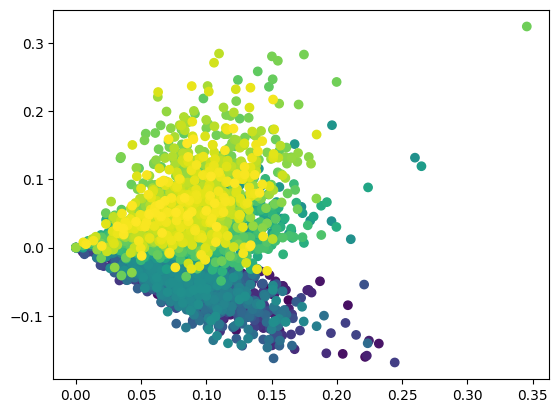

In [27]:
import sklearn
import sklearn.decomposition    
X=tfidfmatrix.copy()
# Normalize tf-idf vector norms
for k in range(n_docs):
    # print(k)
    X[k,:]=X[k,:]/numpy.sqrt(numpy.sum(X[k,:].multiply(X[k,:]),axis=1)[0]+0.0000000001)
# Plot projected documents
svdmodel=sklearn.decomposition.TruncatedSVD(n_components=2, n_iter=70, random_state=42)
documentplot = svdmodel.fit(X).transform(X)
import matplotlib.pyplot
# %matplotlib auto
%matplotlib inline
myfigure, myaxes = matplotlib.pyplot.subplots();
myaxes.scatter(documentplot[:,0],documentplot[:,1], c=directoryindices);


In [28]:
# calculate the variance
print("The percentage of total variance in the dataset explained by each",
      "component from Sklearn PCA.\n",
      svdmodel.explained_variance_ratio_.sum())

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 0.004940909185449788


Discussion:

There seems to be 4 different groups, which could be observed in the figure
However, there is a lot of overlap between the groups, which means that the
PCA does not give a good separation of the groups. This is probably due to the fact that the data is not linearly separable.


Exercise 11.2: t-SNE plot of four newsgroups. Using the same data as in exercise 6.1 (four
newsgroups), use the t-distributed stochastic neighbor embedding (t-SNE) method to reduce the TF-
IDF vectors of the documents (as computed in exercise 6.1) to two dimensions. 
Plot the resulting two-dimensional vectors; plot the documents of the different four newsgroups
with different colors. Discuss the results: does the t-SNE plot tell something about the distribution
of the document features?
You can use the Python implementation discussed on the lecture (lecture 11, slide 7), or another
language/library of your choice. 

• Hint 1: If the t-SNE computation takes too long on your computer, it is ok to use a subset of
the documents, e.g. 1000 or 500 samples. 

• Hint 2: If the plot looks like a central mass of points and isolated groups of points very far
from the center, the far-away groups may be outliers: in that case, you can set the axis limits
of your plot to focus on the central group. In Python, if you created a myaxis object using
matplotlib.pyplot.subplots(), then you can set the axis limits by
myaxes.axis([-50, 50, -50, 50]) where the first two numbers are the
horizontal minimum and maximum and the last two are the vertical minimum and
maximum.

Report your code, the resulting plot, and your discussion.

In [29]:
# Create a 1000-sample subset to avoid long running times
subsetindices=numpy.random.permutation(numpy.shape(X)[0])
Xsmall=X[subsetindices[0:1000],:].toarray()
# Run t-SNE
import sklearn.manifold
tsnemodel = sklearn.manifold.TSNE(n_components=2, verbose=1, perplexity=20, n_iter=400)
tsneplot = tsnemodel.fit_transform(Xsmall)
# Plot the result
import matplotlib.pyplot
%matplotlib auto
myfigure, myaxes = matplotlib.pyplot.subplots();
myaxes.scatter(tsneplot[:,0],tsneplot[:,1]);

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.032s...


c:\Users\nguye\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\nguye\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\nguye\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\nguye\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

[t-SNE] Computed neighbors for 1000 samples in 0.620s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.458530
[t-SNE] KL divergence after 250 iterations with early exaggeration: 118.521965
[t-SNE] KL divergence after 400 iterations: 3.229173
Using matplotlib backend: <object object at 0x0000024E7140DD70>


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.001s...
[t-SNE] Computed neighbors for 4000 samples in 0.268s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.087376
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.125969
[t-SNE] KL divergence after 400 iterations: 1.838647


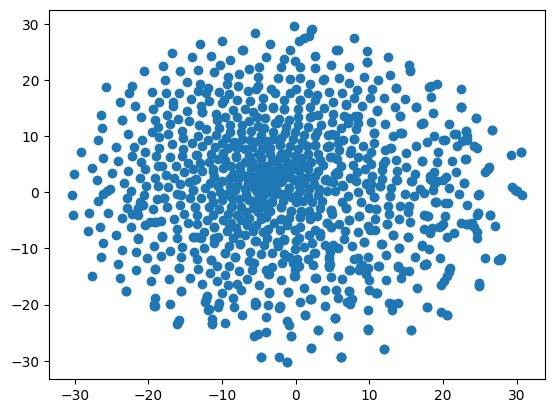

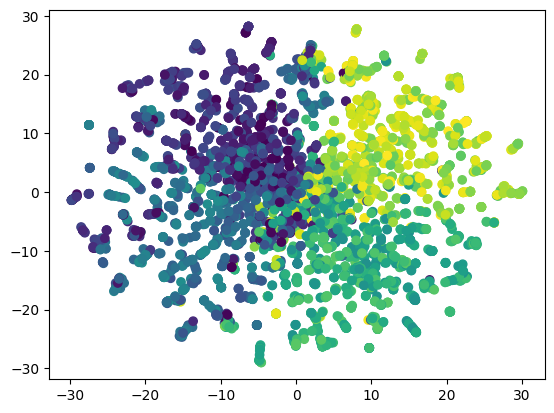

In [30]:
#%% PCA followed by t-SNE
# Find a 100-dimensional PCA projection
svdmodel=sklearn.decomposition.TruncatedSVD(n_components=100, n_iter=70, random_state=42)
pcaplot = svdmodel.fit(X).transform(X)
Xsmaller=pcaplot[subsetindices,:]
# Run t-SNE on the 100-dimensional PCA-projected data
tsneplot2 = tsnemodel.fit_transform(Xsmaller)
import matplotlib.pyplot
# %matplotlib auto
%matplotlib inline
myfigure, myaxes = matplotlib.pyplot.subplots();
myaxes.scatter(tsneplot2[:,0],tsneplot2[:,1],c=subsetindices);

Discussion:

Comparision of PCA and t-SNE:
the groups have been seperated better with t-SNE than with PCA. However, there is still a lot of overlap between the each two groups.

Exercise 11.3: Word embedding. In this exercise we use the same data as in exercise 8.1
(provided in "hmm_sentences.txt" for that exercise, one sentence per line, and also in the current
exercise package; in the current package we also provide a subdirectory "hmm_sentences" with the
same data as separate files for each sentence). Note: you do not need to prune the vocabulary of
these texts since it is so small already.

Using the gensim library as in lecture 11 slide 24, or using another language/library of your choice,
create 5-dimensional word2vec embeddings for the data. Use a window size of 3 words.
Report the resulting embeddings (vectors) for the words "where", "dog", and "explain".

In [31]:
# Read the the file hmm_sentences.txt
file = open("hmm_sentences.txt", "r")
lines = file.readlines()
lines = [line for line in lines if line.strip() != ""]
mycrawled_texts = lines
file.close()

In [32]:
# %% Tokenize loaded texts and change them to NLTK format
mycrawled_nltktexts = []
for k in range(len(mycrawled_texts)):
    temp_tokenizedtext = nltk.word_tokenize(mycrawled_texts[k])
    temp_nltktext = nltk.Text(temp_tokenizedtext)
    mycrawled_nltktexts.append(temp_nltktext)

In [33]:
# %% Make all crawled texts lowercase
mycrawled_lowercasetexts = []
for k in range(len(mycrawled_nltktexts)):
    temp_lowercasetext = []
    for l in range(len(mycrawled_nltktexts[k])):
        lowercaseword = mycrawled_nltktexts[k][l].lower()
        temp_lowercasetext.append(lowercaseword)
    temp_lowercasetest = nltk.Text(temp_lowercasetext)
    mycrawled_lowercasetexts.append(temp_lowercasetext)

In [34]:
# %% POS tag and lemmatize the loaded texts
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatizetext(nltktexttolemmatize):
    # Tag the text with POS tags
    taggedtext = nltk.pos_tag(nltktexttolemmatize)
    # Lemmatize each word text
    lemmatizedtext = []
    for l in range(len(taggedtext)):
        # Lemmatize a word using the WordNet converted POS tag
        wordtolemmatize = taggedtext[l][0]
        wordnettag = tagtowordnet(taggedtext[l][1])
        if wordnettag != -1:
            lemmatizedword = lemmatizer.lemmatize(wordtolemmatize, wordnettag)
        else:
            lemmatizedword = wordtolemmatize
        # Store the lemmatized word
        lemmatizedtext.append(lemmatizedword)
    return lemmatizedtext


mycrawled_lemmatizedtexts = []
for k in range(len(mycrawled_lowercasetexts)):
    lemmatizedtext = lemmatizetext(mycrawled_lowercasetexts[k])
    lemmatizedtext = nltk.Text(lemmatizedtext)
    mycrawled_lemmatizedtexts.append(lemmatizedtext)

In [35]:
# convert mycrawled_prunedtexts to a list of string, since now it is in the type nltk tẽt
mycrawled_prunedtexts_copy = []
# for i in range(len(mycrawled_lemmatizedtexts)):
#     mycrawled_prunedtexts_copy.append(" ".join(mycrawled_lemmatizedtexts[i]))

print(mycrawled_prunedtexts_copy)

[]


In [36]:
mycrawled_prunedtexts = mycrawled_lemmatizedtexts

In [37]:
import gensim
# Create a dictionary from the documents
gensim_docs=mycrawled_prunedtexts
gensim_dictionary = gensim.corpora.Dictionary(gensim_docs)
# Training algorithm: set to 0 for CBOW, 1 for skip-gram
trainingalgorithm=0
# Train the word2vec model
word2vecmodel = gensim.models.word2vec.Word2Vec(sentences=gensim_docs, \
    vector_size=100, window=5, min_count=1, workers=4, sg=trainingalgorithm)
# Access the word vectors for specific words
word_vector_where = word2vecmodel.wv['where']
word_vector_dog = word2vecmodel.wv['dog']
word_vector_explain = word2vecmodel.wv['explain']

# Print the word vectors
print("Word vector for 'where':", word_vector_where)
print("Word vector for 'dog':", word_vector_dog)
print("Word vector for 'explain':", word_vector_explain)


Word vector for 'where': [ 0.00072299  0.13151002  0.07078359  0.13768089  0.03574736 -0.20152636
  0.15084377  0.3851737  -0.08781181 -0.27944437  0.09497826 -0.34095052
 -0.02013772  0.11394619 -0.02106971 -0.13479942  0.26167956  0.00376121
 -0.07496813 -0.4742595   0.15137522 -0.0065472   0.23533592 -0.09657317
 -0.07364411  0.07411467 -0.21905528  0.13322464 -0.11786345  0.10082649
  0.17849196 -0.20528175  0.13117932 -0.4170519  -0.07502229  0.11809489
  0.18028468  0.04739392 -0.13334788  0.01080245  0.09548335 -0.27325404
 -0.13861431  0.10352644  0.06415075 -0.16400337 -0.0759094  -0.18013404
  0.1507971   0.17806135  0.0719133  -0.22774646  0.002436    0.04274559
 -0.09723171  0.03283095  0.23298253 -0.03991424 -0.12475833  0.12845407
 -0.0777549  -0.16359472  0.29165637  0.06402171 -0.16367319  0.3596375
 -0.02974775  0.21354192 -0.2548325   0.07417451  0.08613041  0.16727118
  0.28710157  0.07978146  0.22249302  0.02799552  0.04919799  0.18319252
 -0.03603661 -0.06843404 -0